# 연령별 취업자수 관계 

- 국가 통계 포털에서 행정구역(시도)/성/연령별 취업자 데이터 다운로드
- 전처리하기
- 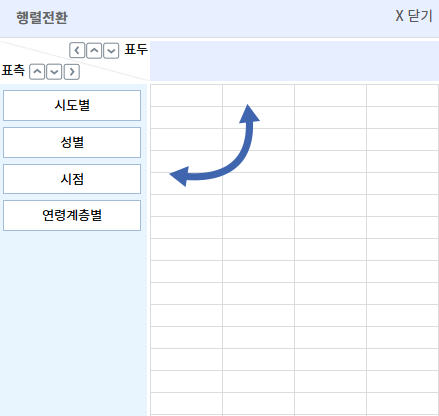
- 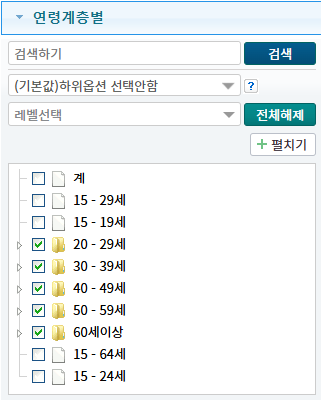
- 2014 4/1 ~ 2024/4 년도 전부다 체크 

In [1]:
import pandas as pd  # 데이터 분석을 위한 라이브러리. 데이터프레임을 다루는 데 사용
from matplotlib import rc  # 폰트 설정을 위해 matplotlib의 rc 모듈을 임포트
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 라이브러리. 다양한 그래프와 차트.
import matplotlib.font_manager as fm  # 폰트 관리를 위한 모듈. 그래프에 사용할 폰트를 설정

Text(0.2, 0.4, '한글')

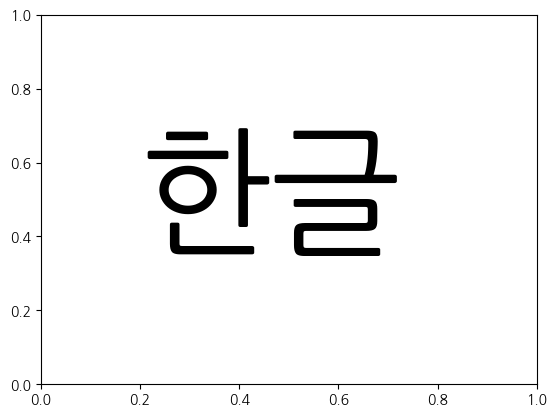

In [2]:
#윈도우용 폰트 경로 설정 
path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.2,0.4,'한글',size=100)

In [3]:
file_path="./ref/행정구역시도_성연령별취업자_20250304.csv"
ori = pd.read_csv(file_path,encoding="EUC-KR")
ori.head()

,시도별,시점,연령계층별,성별,데이터
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773


In [4]:
ex_data = ori.copy() #복사 
ex_data.columns = ['resion','year','age','gender','value'] #컬럼이름 일괄 교체 
ex_data.loc[ex_data['resion']=='세종특별자치시','value'] = ex_data.loc[ex_data['resion']=='세종특별자치시','value'].replace('-',0)
# ex_data.loc[행,열]
ex_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
11515,제주도,2024,40 - 49세,여자,43
11516,제주도,2024,50 - 59세,남자,54
11517,제주도,2024,50 - 59세,여자,45
11518,제주도,2024,60세이상,남자,48


In [5]:
ex_data['value'] = ex_data['value'].astype(int)
ex1_data = ex_data.groupby('year')['value'].sum().reset_index(name="total")
ex1_data

,year,total
0,2000,20796
1,2001,21267
2,2002,21929
3,2003,21965
4,2004,22426
...,...,...
64,2024,28433
65,2024.1/4,27927
66,2024.2/4,28689
67,2024.3/4,28682


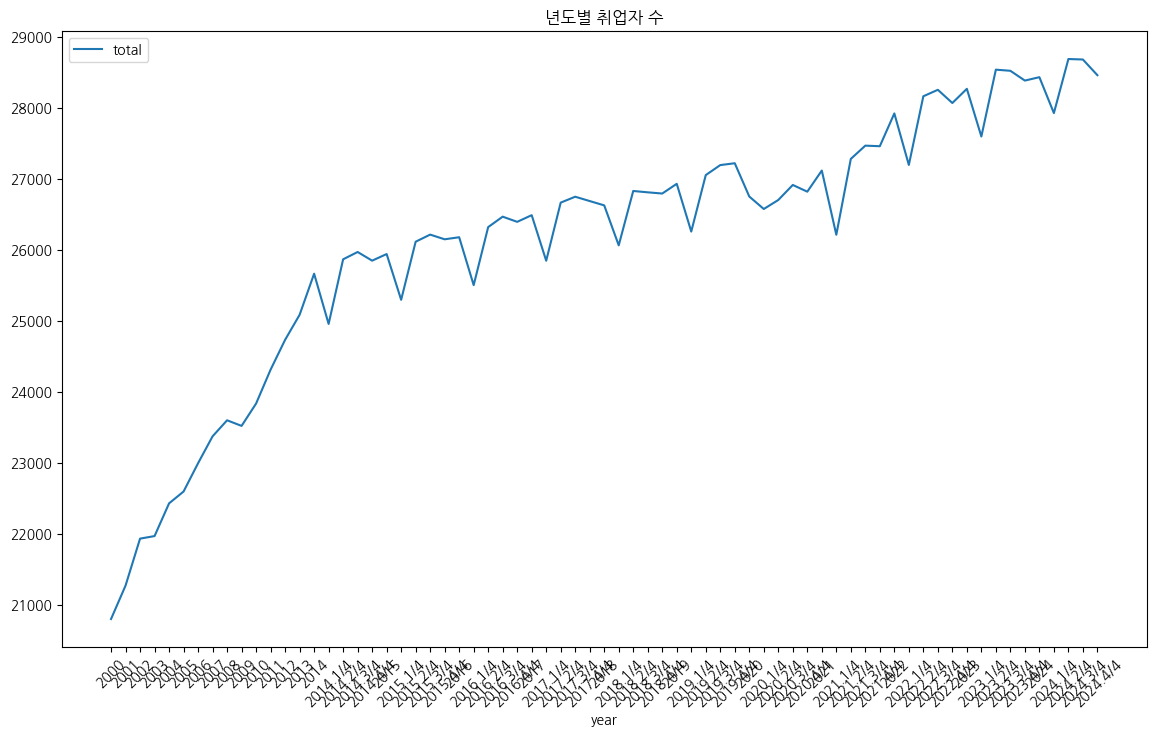

In [6]:
# 데이터프레임 ex1_data를 사용하여 'year'를 x축, 'total'을 y축으로 하는 그래프를 그립니다.
# 그래프 크기는 14x8로 설정하고 제목을 '년도별 취업자 수'로 지정합니다.
ax = ex1_data.plot(x='year', y='total', figsize=(14,8), title="년도별 취업자 수")

# x축의 눈금(tick)을 설정합니다. ex1_data의 길이만큼 범위를 지정합니다.
ax.set_xticks(range(len(ex1_data)))

# x축의 눈금 레이블을 설정합니다. 'year' 열의 값을 사용하고, 레이블을 45도 회전시킵니다.
ax.set_xticklabels(ex1_data['year'], rotation=45)

# 그래프를 화면에 표시합니다.
plt.show()

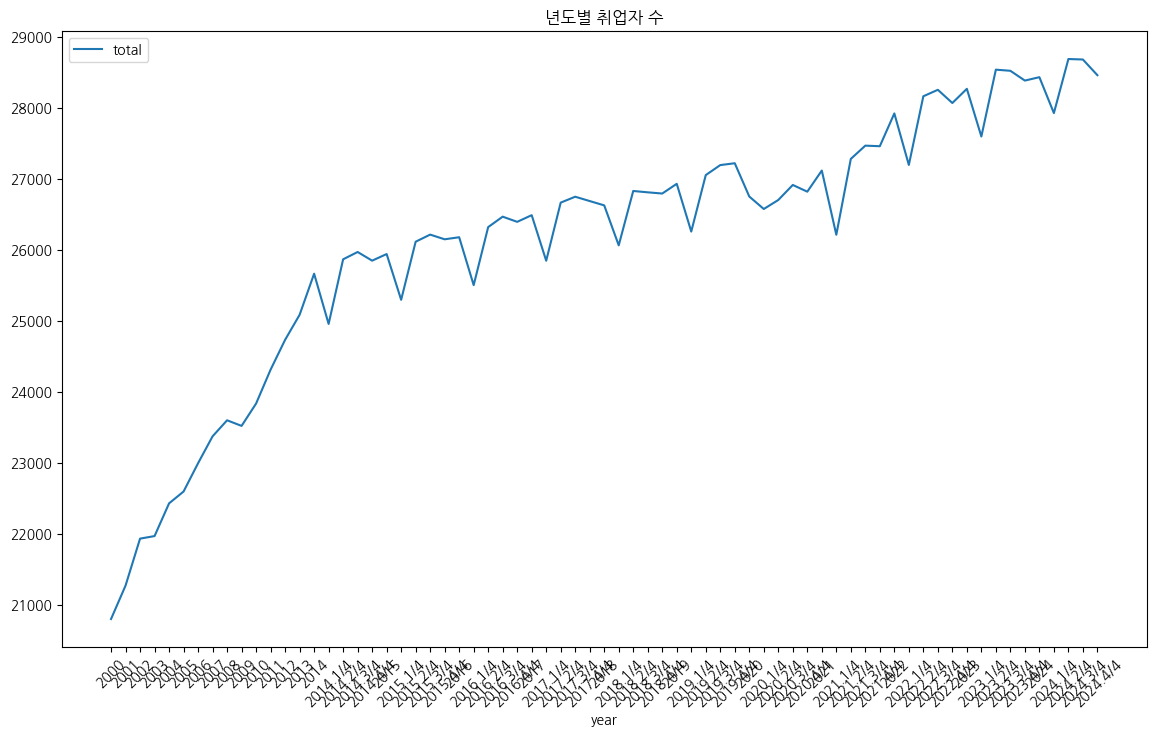

In [7]:
#데이터프레임 ex1_data를 사용하여 'year'를 x축 , 'total'을 y축으로 하는 그래프를 그림 
#그래프 크기는 14x8 로 설정하고 제목을 '년도별 취업자 수 '
ax = ex1_data.plot(x='year',y='total',figsize=(14,8),title="년도별 취업자 수")

#x축의 눈금(tick)을 설정. ex1_data의 길이만큼 범위를 지정 
ax.set_xticks(range(len(ex1_data)))

#x축의 눈금 레이블을 설정. 'year'열의 값을 사용하고 레이블을 45도 회전시킴 
ax.set_xticklabels(ex1_data['year'],rotation=45)
plt.show()

In [8]:
ex2_data = ori.copy() #복사 
ex2_data.columns = ['resion','year','age','gender','value'] #칼럼이름 일괄 교체 
ex2_data.loc[ex2_data['resion']=='세종특별자치시','value'] = ex2_data.loc[ex_data['resion']=='세종특별자치시','value'].replace('-',0) #세종특별자치시 
ex2_data 

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
11515,제주도,2024,40 - 49세,여자,43
11516,제주도,2024,50 - 59세,남자,54
11517,제주도,2024,50 - 59세,여자,45
11518,제주도,2024,60세이상,남자,48


In [9]:
ex2_data['value'] = ex2_data['value'].astype(int)
gen = ex2_data.groupby(['year','gender'])['value'].sum().reset_index(name='total')
gen

,year,gender,total
0,2000,남자,12219
1,2000,여자,8577
2,2001,남자,12448
3,2001,여자,8819
4,2002,남자,12853
...,...,...,...
133,2024.2/4,여자,12716
134,2024.3/4,남자,15945
135,2024.3/4,여자,12737
136,2024.4/4,남자,15868


In [10]:
filter_m = gen['gender']=='남자'
filter_f = gen['gender']=='여자'
male = gen[filter_m]
female = gen[filter_f]

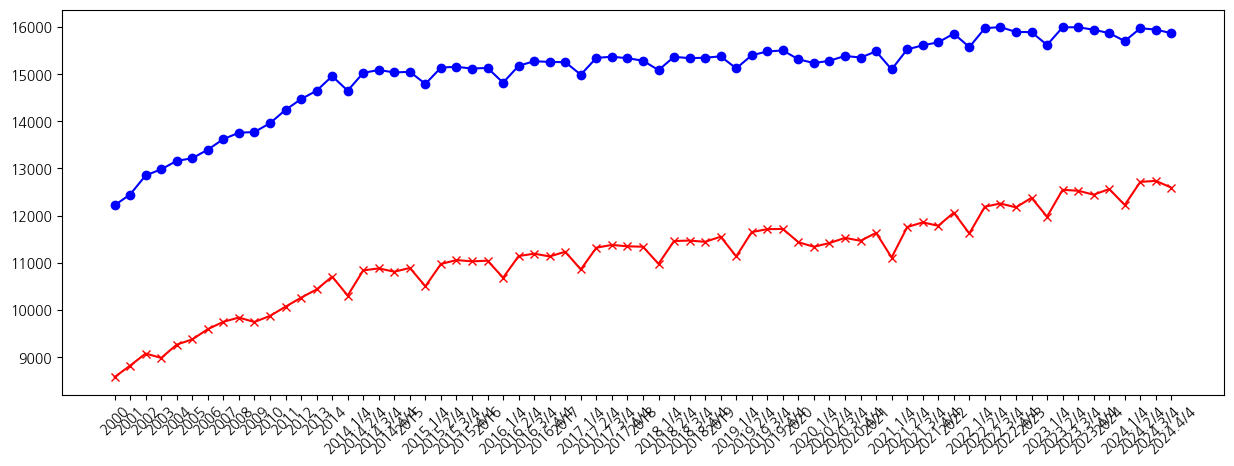

In [11]:
#그래프 크기 설정 (가로 15, 세로 5 )
plt.figure(figsize=(15,5))

#'male'은 데이터프레임에서 'year'와 'total' 열을 사용해 라인 그래프를 그림 
# 레이블은 '남자', 색상은 파란색 , 선 스타일은 실선 , 마커는 원형 
plt.plot(male['year'],male['total'],label='남자',color="blue",linestyle='-',marker='o')

#'female'은 데이터프레임에서 'year'와 'total' 열을 사용해 라인 그래프를 그림
# 레이블은 '여자', 색상은 빨간색, 선 스타일은 실선 , 마커는 x자 
plt.plot(female['year'],female['total'],label='여자',color="red",linestyle='-',marker= 'x')

#x축의 눈금(tick)을 설정. ex1_data의 길이만큼 범위 지정
plt.xticks(range(len(ex1_data)))

#x축의 눈금 레이블 설정. 'year' 열의 값을 사용하고, 레이블을 45도 회전 
plt.xticks(ex1_data['year'],rotation=45)

# 그래프 화면에 표시 
plt.show()

In [12]:
#ori 데이터 프레임을 복사하여 ex3_data에 저장 
ex3_data = ori.copy()

#ex3_data에서 결측값(NaN)을 0으로 채움 
#NaN : 값이 없는 경우 
ex3_data = ex3_data.fillna(0)

#'데이터' 열에서 '-'값을 0으로 대체 
ex3_data['데이터'] = ex3_data['데이터'].replace('-',0)

#'데이터' 열에서 결측값을 0으로 채운 후, 데이터를 정수(int)형으로 변환 
ex3_data['데이터'] = ex3_data['데이터'].fillna(0).astype(int)

In [13]:
# '시점' 열에서 2018년 1/4분기 이상이고 2019년 1/4분기 이하인 행을 선택합니다.
filter0 = (ex3_data['시점'] >= "2018.1/4") & (ex3_data['시점'] <= "2019.1/4")

# 선택된 행들 중에서 임의로 20개의 샘플을 추출합니다.
filter0.sample(20)


7900     False
7654     False
5032     False
1065     False
3428     False
719      False
4120     False
7594     False
6278     False
10825    False
3516     False
5570     False
740      False
10381    False
121      False
9807     False
3109     False
8144     False
7482     False
3085     False
Name: 시점, dtype: bool

In [14]:
# '시점'열에서 2018년 1/4분기 이상이고, 2019년 1/4분기 이하인 행을 선택 
filter0 = (ex3_data['시점']>= "2018.1/4") & (ex3_data['시점']<="2019.1/4")

#선택된 행들 중에서 임의로 20개 샘플 추출 dtype :bool 
# filter0.sample(20) 

ex3_data = ex3_data[filter0]
ex3_data.head()

,시도별,시점,연령계층별,성별,데이터
160,서울특별시,2018.1/4,20 - 29세,남자,339
161,서울특별시,2018.1/4,20 - 29세,여자,477
162,서울특별시,2018.1/4,30 - 39세,남자,693
163,서울특별시,2018.1/4,30 - 39세,여자,513
164,서울특별시,2018.1/4,40 - 49세,남자,719


In [15]:
# ex3_data 데이터프레임에서 '연령계층별 '열의 값이 '20-29세' 인 행들만 선택 
x_data = ex3_data[ex3_data['연령계층별'].isin(['20-29세'])]

# x_data 데이터프레임에서 '데이터' 열의 모든 값을 정수(int) 형으로 변환 
# x_data.loc[:,'데이터']=x_data.loc[:,'데이터'].astype(int)

#ex3_data 데이터프레임에서 '연령계층별' 열의 값이 '60세이상' 인 행들만 선택 
y_data = ex3_data[ex3_data['연령계층별'].isin(['60세이상'])]

#y_data 데이터프레임에서 '데이터' 열의 모든 값을 정수(int) 형으로 변환 
# y_data.loc[:,'데이터'] = y_data.loc[:,'데이터'].astype(int)

z_data = ex3_data

#ex3_data 데이터프레임에서 '데이터' 열의 모든 값을 정수(int) 형으로 변환 
# z_data.loc[:,'데이터'] = ex3_data.loc[:,'데이터'].astype(int)

x = x_data.groupby('시도별')['데이터'].sum()#.reset_index(name='total') #시도별 20대 취업자 
y = y_data.groupby('시도별')['데이터'].sum()#.reset_index(name='total') #시도별 60대(정년퇴임) 취업
z = z_data.groupby('시도별')['데이터'].sum()#.reset_index(name='total') #시도별 전체 취업자수 

In [16]:
import numpy as np 
regions = list(x.index) # x 데이터 프레임의 인덱스를 리스트로 변환하여 regions 변수에 저장 #라벨 
color = [np.random.rand(3,) for _ in range(len(regions))] #regions의 길이만큼 3개의 랜덤한 색상값을 생성하여 color 리스트에 저장 

ValueError: x and y must be the same size

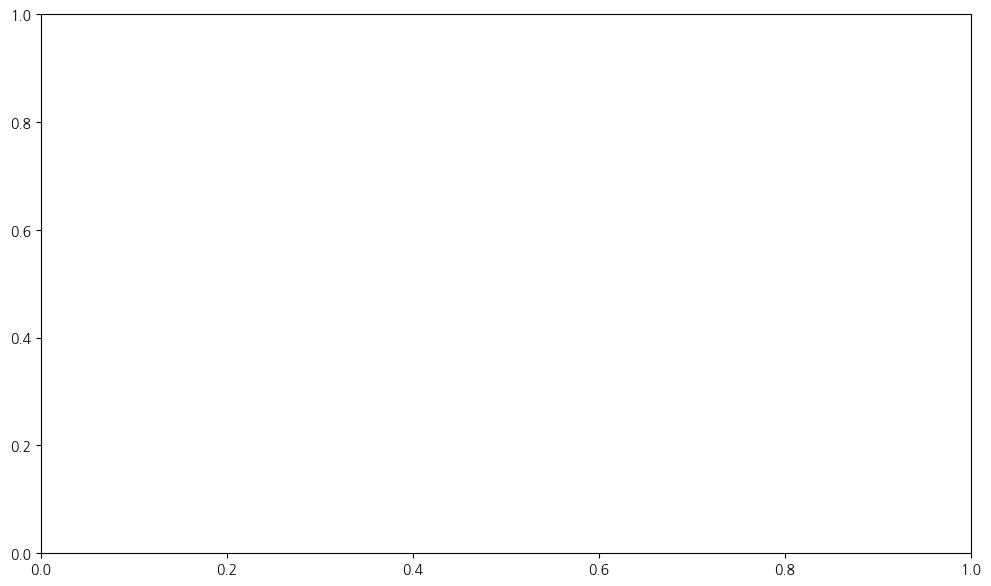

In [17]:
# 12x7 크기의 서브플롯(fig, ax)을 생성합니다.
fig, ax = plt.subplots(figsize=(12, 7))

# 'z' 배열을 float 형식으로 변환합니다.
z = np.array(z, dtype=float)

# x와 y 데이터를 사용하여 산포도(scatter plot)를 그립니다.
# 점의 크기는 'z' 값의 0.5배, 색상은 'color' 리스트, 투명도는 0.5로 설정합니다.
scatter = ax.scatter(x, y, s=z*0.5, c=color, alpha=0.5)

# 'regions' 리스트의 각 항목에 대해 반복하여 각 점에 레이블을 추가합니다.
for n in range(len(regions)):
    ax.annotate(regions[n], xy=(x.iloc[n], y.iloc[n]), ha="center")

# 빨간색, 점선, 너비 2의 대각선(0,4000)을 그립니다.
ax.plot([0, 4000], [0, 4000], color="r", linestyle="--", linewidth=2)

# 그래프의 제목을 설정합니다.
ax.set_title("2018년 전국 청년과 60세 이상 취업자수 관계")

# x축 레이블을 설정합니다.
ax.set_xlabel("청년 취업자")

# y축 레이블을 설정합니다.
ax.set_ylabel("60세 이상 취업자")

# 그래프를 화면에 표시합니다.
plt.show()
